### Metro 911 Calls Geospatial

In [1]:


from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
tornado_911 = pd.read_csv('../data/911_Phone_Calls_Tornado_030320.csv')
derecho_911 = pd.read_csv('../data/911_Phone Calls_Derecho_050320 050420.csv')
tornado_dispatch = pd.read_csv('../data/Computer Aided Dispatch Data_Tornado Incidents 030320.csv', skiprows=2)
derecho_dispatch = pd.read_csv('../data/Computer Aided Dispatch Data_Derecho Incidents 050320-050420.csv', skiprows=2)



In [4]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

epsg:4326


zip objectid    po_name      shape_stlength        shape_starea  \
0  37115        1    MADISON  178783.02488886821  596553400.57885742   
1  37216        3  NASHVILLE  75820.997821400058  188884682.28344727   
2  37204        9  NASHVILLE  93180.292250425613  200664795.51708984   
3  37027       11  BRENTWOOD   159760.6942933173  174978422.04101562   
4  37064       18   FRANKLIN  28995.828320601937  46969608.005737305   

                                            geometry  
0  MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...  
1  MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...  
2  MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...  
3  MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...  
4  MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ...

<AxesSubplot:>

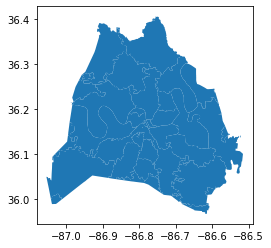

In [5]:
zipcodes.plot()

In [6]:
print(tornado_911
     )

    Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
0      3/3/2020 0:34  911 Calls     36.072708     -86.665779   
1      3/3/2020 0:36  911 Calls     36.159634     -86.841904   
2      3/3/2020 0:36  911 Calls     36.264153     -86.708862   
3      3/3/2020 0:36  911 Calls           NaN            NaN   
4      3/3/2020 0:36  911 Calls     36.233467     -86.721077   
..               ...        ...           ...            ...   
470    3/3/2020 4:54  911 Calls     36.142552     -86.635330   
471    3/3/2020 4:54  911 Calls     36.189415     -86.813557   
472    3/3/2020 4:55  911 Calls     36.223534     -86.757874   
473    3/3/2020 4:56  911 Calls     36.168398     -86.783774   
474    3/3/2020 4:58  911 Calls     36.276566     -86.799417   

                    Cell Tower Address  
0           620 Richards RD - N Sector  
1               4507D KENTUCKY AV - SE  
2             329 THELMA ST - S Sector  
3                       526 FOUNDRY DR  
4                 5007B RU

In [9]:
tornado_911 = tornado_911.rename(columns = {'ALI Latitude': 'lat'})
tornado_911 = tornado_911.rename(columns = {'ALI Longitude':'long'})
print(tornado_911)

    Seizure DateTime CallTypeId        lat       long  \
0      3/3/2020 0:34  911 Calls  36.072708 -86.665779   
1      3/3/2020 0:36  911 Calls  36.159634 -86.841904   
2      3/3/2020 0:36  911 Calls  36.264153 -86.708862   
3      3/3/2020 0:36  911 Calls        NaN        NaN   
4      3/3/2020 0:36  911 Calls  36.233467 -86.721077   
..               ...        ...        ...        ...   
470    3/3/2020 4:54  911 Calls  36.142552 -86.635330   
471    3/3/2020 4:54  911 Calls  36.189415 -86.813557   
472    3/3/2020 4:55  911 Calls  36.223534 -86.757874   
473    3/3/2020 4:56  911 Calls  36.168398 -86.783774   
474    3/3/2020 4:58  911 Calls  36.276566 -86.799417   

                    Cell Tower Address  
0           620 Richards RD - N Sector  
1               4507D KENTUCKY AV - SE  
2             329 THELMA ST - S Sector  
3                       526 FOUNDRY DR  
4                 5007B RUSKIN AVE - N  
..                                 ...  
470                    WIREL

In [11]:
tornado_911['geometry'] = tornado_911.apply(lambda x: Point((float(x.long),float(x.lat))),axis=1)
tornado_911.head

<bound method NDFrame.head of     Seizure DateTime CallTypeId        lat       long  \
0      3/3/2020 0:34  911 Calls  36.072708 -86.665779   
1      3/3/2020 0:36  911 Calls  36.159634 -86.841904   
2      3/3/2020 0:36  911 Calls  36.264153 -86.708862   
3      3/3/2020 0:36  911 Calls        NaN        NaN   
4      3/3/2020 0:36  911 Calls  36.233467 -86.721077   
..               ...        ...        ...        ...   
470    3/3/2020 4:54  911 Calls  36.142552 -86.635330   
471    3/3/2020 4:54  911 Calls  36.189415 -86.813557   
472    3/3/2020 4:55  911 Calls  36.223534 -86.757874   
473    3/3/2020 4:56  911 Calls  36.168398 -86.783774   
474    3/3/2020 4:58  911 Calls  36.276566 -86.799417   

                    Cell Tower Address                              geometry  
0           620 Richards RD - N Sector          POINT (-86.665779 36.072708)  
1               4507D KENTUCKY AV - SE          POINT (-86.841904 36.159634)  
2             329 THELMA ST - S Sector          

In [12]:
tornado_geo = gpd.GeoDataFrame(tornado_911, crs=zipcodes.crs,
                              geometry = tornado_911['geometry'])
type(tornado_geo)

geopandas.geodataframe.GeoDataFrame

In [13]:
zipcodes=zipcodes[['zip', 'po_name', 'geometry']]

In [14]:
tornado_calls_by_zip = gpd.sjoin(tornado_geo, zipcodes, op = 'within')

In [15]:
tornado_calls_by_zip.head()

Seizure DateTime CallTypeId        lat       long  \
0      3/3/2020 0:34  911 Calls  36.072708 -86.665779   
10     3/3/2020 0:38  911 Calls  36.052055 -86.648331   
64     3/3/2020 0:53  911 Calls  36.050048 -86.650629   
194    3/3/2020 1:29  911 Calls  36.068298 -86.681550   
234    3/3/2020 1:40  911 Calls  36.058578 -86.699745   

                Cell Tower Address                    geometry  index_right  \
0       620 Richards RD - N Sector  POINT (-86.66578 36.07271)           50   
10       745 BELL RD - OMNI Sector  POINT (-86.64833 36.05205)           50   
64             5646 AMALIE DR - SE  POINT (-86.65063 36.05005)           50   
194  3930 APACHE TRAIL - SE SECTOR  POINT (-86.68155 36.06830)           50   
234           5067 COLEMONT DR - N  POINT (-86.69974 36.05858)           50   

       zip  po_name  
0    37013  ANTIOCH  
10   37013  ANTIOCH  
64   37013  ANTIOCH  
194  37013  ANTIOCH  
234  37013  ANTIOCH

In [16]:
tornado_calls_by_zip['zip'].value_counts()

37206    90
37208    80
37076    56
37214    32
37207    30
37209    24
37013    17
37203    14
37115    12
37201    12
37219     9
37210     8
37189     7
37217     7
37213     6
37211     5
37215     4
37216     3
37221     3
37072     3
37212     2
37218     2
37205     2
37138     2
37228     1
37204     1
37080     1
37232     1
Name: zip, dtype: int64

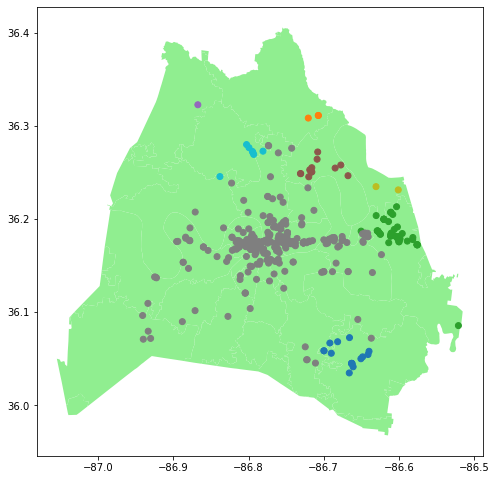

In [22]:
ax = zipcodes.plot(figsize = (8,10), color='lightgreen')
tornado_calls_by_zip.plot(ax=ax,column ='po_name');
plt.show()


In [23]:
zipcodes.geometry.centroid

<ipython-input-23-2dee0cdaba00>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zipcodes.geometry.centroid


0     POINT (-86.69477 36.25433)
1     POINT (-86.72635 36.21605)
2     POINT (-86.77467 36.10566)
3     POINT (-86.78551 36.04148)
4     POINT (-87.02866 36.00026)
5     POINT (-87.03712 36.08997)
6     POINT (-86.86263 36.38001)
7     POINT (-86.97531 36.06283)
8     POINT (-86.76433 36.33621)
9     POINT (-86.80157 36.13335)
10    POINT (-86.63653 35.98113)
11    POINT (-86.72226 36.00938)
12    POINT (-86.91816 36.15605)
13    POINT (-86.73098 36.18090)
14    POINT (-86.69470 36.00387)
15    POINT (-86.85733 36.37882)
16    POINT (-86.72570 36.00942)
17    POINT (-86.66093 36.10779)
18    POINT (-86.82996 36.27880)
19    POINT (-86.78726 36.28724)
20    POINT (-86.89487 36.32034)
21    POINT (-86.68513 35.99434)
22    POINT (-86.64118 36.25192)
23    POINT (-86.98674 36.15655)
24    POINT (-86.78317 36.16682)
25    POINT (-86.68331 35.99201)
26    POINT (-86.76289 36.39920)
27    POINT (-86.89039 36.20505)
28    POINT (-86.52221 36.13926)
29    POINT (-86.67866 35.98840)
30    POIN

In [24]:
center = zipcodes.geometry.centroid[19]

<ipython-input-24-9214b2d35599>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = zipcodes.geometry.centroid[19]


In [25]:
area_center= [center.y, center.x]
print(area_center)

[36.28723914829086, -86.78726069494236]


In [26]:
#create our map of Nashville Zip Codes and show it
map_tornado_911_calls=folium.Map(location = area_center, zoom_start = 12)
map_tornado_911_calls

In [27]:
i=0
for row_index, row_values in tornado_calls_by_zip.iterrows():
    if i<3:
        print('index is ', row_index)
        print('values are: ')
        print(' ')
        print(row_values)
        print('--------------------------')
        i+=1

index is  0
values are: 
 
Seizure DateTime                     3/3/2020 0:34
CallTypeId                               911 Calls
lat                                        36.0727
long                                      -86.6658
Cell Tower Address      620 Richards RD - N Sector
geometry              POINT (-86.665779 36.072708)
index_right                                     50
zip                                          37013
po_name                                    ANTIOCH
Name: 0, dtype: object
--------------------------
index is  10
values are: 
 
Seizure DateTime                     3/3/2020 0:38
CallTypeId                               911 Calls
lat                                        36.0521
long                                      -86.6483
Cell Tower Address       745 BELL RD - OMNI Sector
geometry              POINT (-86.648331 36.052055)
index_right                                     50
zip                                          37013
po_name                     

In [32]:
#draw our zip code area: 37207
map_tornado_911_calls = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(zipcodes).add_to(map_tornado_911_calls)

#iterate through po_name to create locations and markers 
#for calls
#remember for Folium locations, lat is listed first!!

for row_index, row_values in tornado_calls_by_zip.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['po_name'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map_tornado_911_calls)
map_tornado_911_calls.save('../maps/map_tornado_911_calls.html')

#display our map
map_tornado_911_calls

In [33]:
folium.Map?

In [35]:
cluster_map_tornado_calls = folium.Map(location = area_center, Zoom_start = 12)
#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_tornado_calls)
folium.GeoJson(zipcodes).add_to(cluster_map_tornado_calls)
# inside the loop add each marker to the cluster
for row_index, row_values in tornado_calls_by_zip.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['po_name'])
    marker = folium.Marker(
        location = loc,
        popup = pop)
    marker.add_to(marker_cluster)
    
#save an interactive HTML map by calling .save()
cluster_map_tornado_calls.save('../maps/cluster_tornado_calls.html')

cluster_map_tornado_calls

